In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("task_3.csv")

In [3]:
df

,metric,feature,rs_object,mean_precision_at_k,mean_recall_at_k,precision_and_recall_interval,mean_ndcg_at_k,genre_coverage_at_k,mean_genre_diversity_at_k
0,random,random,<task1.retrieval_system.RetrievalSystem object...,0.442520,0.000976,recall precision\r\nk ...,0.131709,1.000000,5.067064
1,cosine,tf-idf,<task1.retrieval_system.RetrievalSystem object...,0.510709,0.001340,recall precision\r\nk ...,0.163754,0.982014,4.974558
2,cosine,bert,<task1.retrieval_system.RetrievalSystem object...,0.557192,0.001862,recall precision\r\nk ...,0.196265,0.956835,4.845966
3,dot,word2vec,<task1.retrieval_system.RetrievalSystem object...,0.455934,0.000933,recall precision\r\nk ...,0.124160,0.480216,4.681670
4,cosine,mfcc_bow,<task1.retrieval_system.RetrievalSystem object...,0.588518,0.001737,recall precision\r\nk ...,0.216050,0.981115,4.743527
5,cosine,blf_spectral,<task1.retrieval_system.RetrievalSystem object...,0.589935,0.001800,recall precision\r\nk ...,0.218365,0.972122,4.737670
6,cosine,ivec256,<task1.retrieval_system.RetrievalSystem object...,0.565564,0.001712,recall precision\r\nk ...,0.208839,0.999101,4.905104
7,cosine,musicnn,<task1.retrieval_system.RetrievalSystem object...,0.623598,0.001937,recall precision\r\nk ...,0.231601,0.997302,4.705990
8,cosine,resnet,<task1.retrieval_system.RetrievalSystem object...,0.542074,0.001550,recall precision\r\nk ...,0.202587,0.967626,4.967308
9,cosine,ef_bert_musicnn,<task1.retrieval_system.RetrievalSystem object...,0.653913,0.002340,recall precision\r\nk ...,0.255107,0.984712,4.687251


In [4]:
def parse_precision_recall_data(text: str) -> pd.DataFrame:
    """Function to parse the precision and recall interval data after saving to csv.

    Args:
        text (str): The text to parse.

    Returns:
        pd.DataFrame: DataFrame containing the parsed data.
    """
    # Splitting the text into lines and removing empty lines
    lines = [line.strip() for line in text.split("\n") if line.strip()]

    # Extracting data from each line
    data = []
    for line in lines[1:]:  # Skipping the header line
        match = re.match(r"(\d+)\s+([\d.]+)\s+([\d.]+)", line)
        if match:
            k = int(match.group(1))
            recall = float(match.group(2))
            precision = float(match.group(3))
            data.append((k, recall, precision))

    return pd.DataFrame(data, columns=["k", "recall", "precision"])

In [5]:
parse_precision_recall_data(df["precision_and_recall_interval"][0])

,k,recall,precision
0,100,0.009845,0.445004
1,95,0.009350,0.445063
2,90,0.008860,0.444976
3,85,0.008365,0.445046
4,80,0.007875,0.445097
5,75,0.007375,0.445138
6,70,0.006897,0.445259
7,65,0.006396,0.445241
8,60,0.005910,0.445094
9,55,0.005419,0.445111


With excluding text-based systems

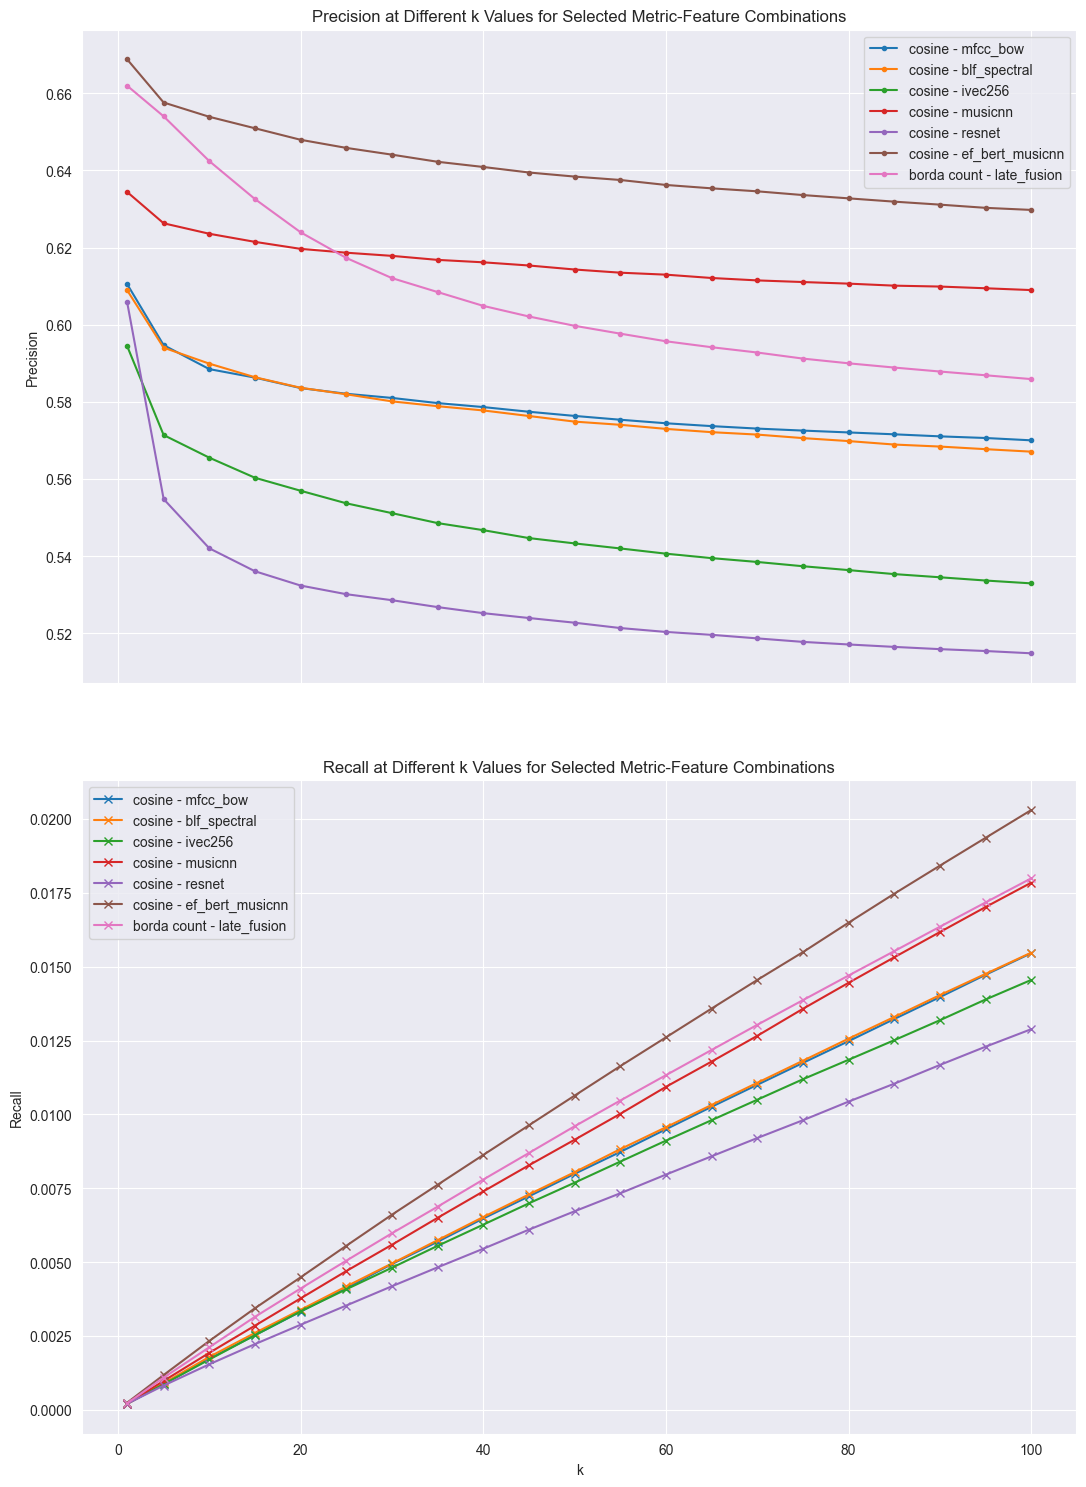

In [6]:
# Selecting a few retrieval systems for plotting
# change unique()[] to whatever systems you want to plot!
# excluded text based rs systems to make it less crowded
selected_rs_objects = df["rs_object"].unique()[4:11]

# Create separate plots for precision and recall for selected metric-feature combinations
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 16), sharex=True)
fig.tight_layout(pad=6.0)

for rs_object in selected_rs_objects:
    row_data = df[df["rs_object"] == rs_object].iloc[0]
    parsed_data = parse_precision_recall_data(row_data["precision_and_recall_interval"])

    legend_label = f'{row_data["metric"]} - {row_data["feature"]}'

    axes[0].plot(
        parsed_data["k"], parsed_data["precision"], marker=".", label=legend_label
    )
    axes[1].plot(
        parsed_data["k"], parsed_data["recall"], marker="x", label=legend_label
    )

axes[0].set_title(
    "Precision at Different k Values for Selected Metric-Feature Combinations"
)
axes[0].set_ylabel("Precision")
axes[0].legend()

axes[1].set_title(
    "Recall at Different k Values for Selected Metric-Feature Combinations"
)
axes[1].set_xlabel("k")
axes[1].set_ylabel("Recall")
axes[1].legend()

plt.show()

Without excluding text-based systems, without random

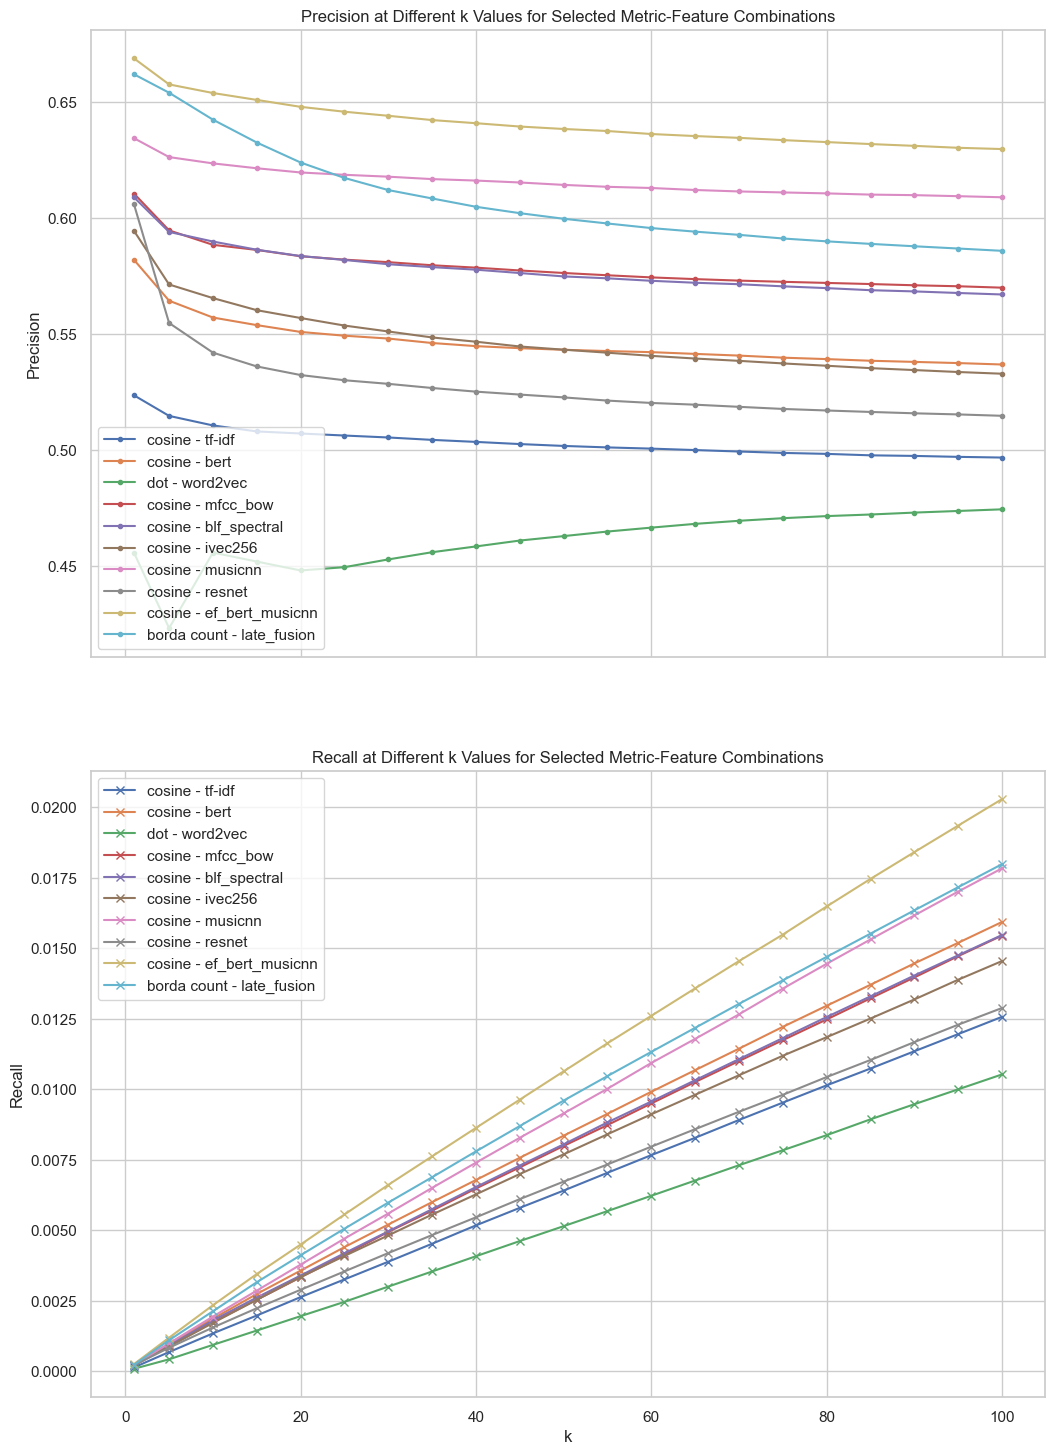

In [17]:
selected_rs_objects = df["rs_object"].unique()[1:11]

# Create separate plots for precision and recall for selected metric-feature combinations
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 16), sharex=True)
fig.tight_layout(pad=6.0)

for rs_object in selected_rs_objects:
    row_data = df[df["rs_object"] == rs_object].iloc[0]
    parsed_data = parse_precision_recall_data(row_data["precision_and_recall_interval"])

    legend_label = f'{row_data["metric"]} - {row_data["feature"]}'

    axes[0].plot(
        parsed_data["k"], parsed_data["precision"], marker=".", label=legend_label
    )
    axes[1].plot(
        parsed_data["k"], parsed_data["recall"], marker="x", label=legend_label
    )

axes[0].set_title(
    "Precision at Different k Values for Selected Metric-Feature Combinations"
)
axes[0].set_ylabel("Precision")
axes[0].legend()

axes[1].set_title(
    "Recall at Different k Values for Selected Metric-Feature Combinations"
)
axes[1].set_xlabel("k")
axes[1].set_ylabel("Recall")
axes[1].legend()

plt.show()

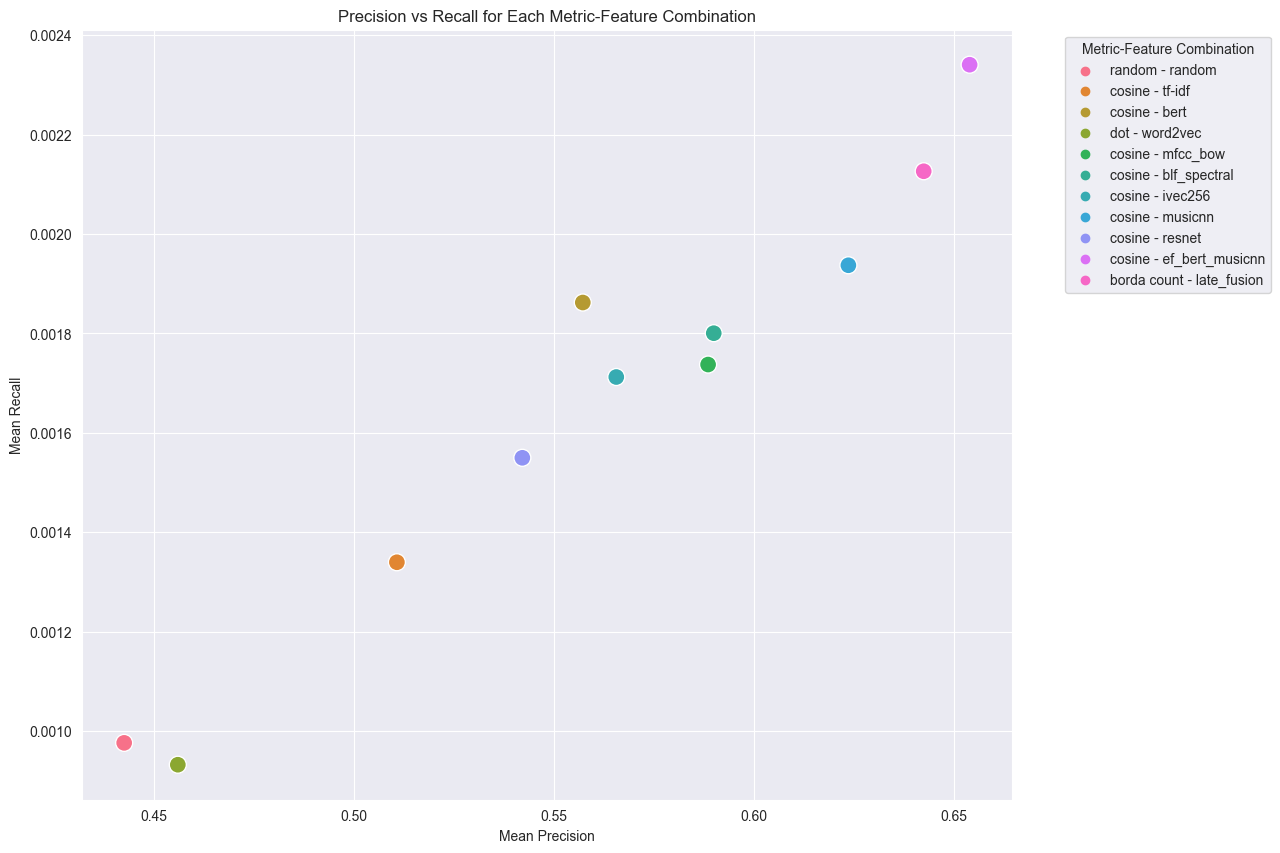

In [8]:
import seaborn as sns
df["metric_feature_combination"] = df["metric"] + " - " + df["feature"]

plt.figure(figsize=(12, 10))
sns.scatterplot(
    x="mean_precision_at_k",
    y="mean_recall_at_k",
    hue="metric_feature_combination",
    data=df,
    s=150,
)
plt.title("Precision vs Recall for Each Metric-Feature Combination")
plt.xlabel("Mean Precision")
plt.ylabel("Mean Recall")
plt.legend(
    title="Metric-Feature Combination", bbox_to_anchor=(1.05, 1), loc="upper left"
)
plt.show()


In [9]:
df[
    [
        "mean_precision_at_k",
        "mean_recall_at_k",
        "mean_ndcg_at_k",
        "genre_coverage_at_k",
        "mean_genre_diversity_at_k",
    ]
].describe()

,mean_precision_at_k,mean_recall_at_k,mean_ndcg_at_k,genre_coverage_at_k,mean_genre_diversity_at_k
count,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.561126,0.001665,0.199647,0.936151,4.820688
std,0.069840,0.000440,0.043279,0.151819,0.137369
min,0.442520,0.000933,0.124160,0.480216,4.681670
25%,0.526392,0.001445,0.180009,0.969874,4.708727
50%,0.565564,0.001737,0.208839,0.981115,4.743527
75%,0.606766,0.001900,0.224983,0.991007,4.936206
max,0.653913,0.002340,0.255107,1.000000,5.067064


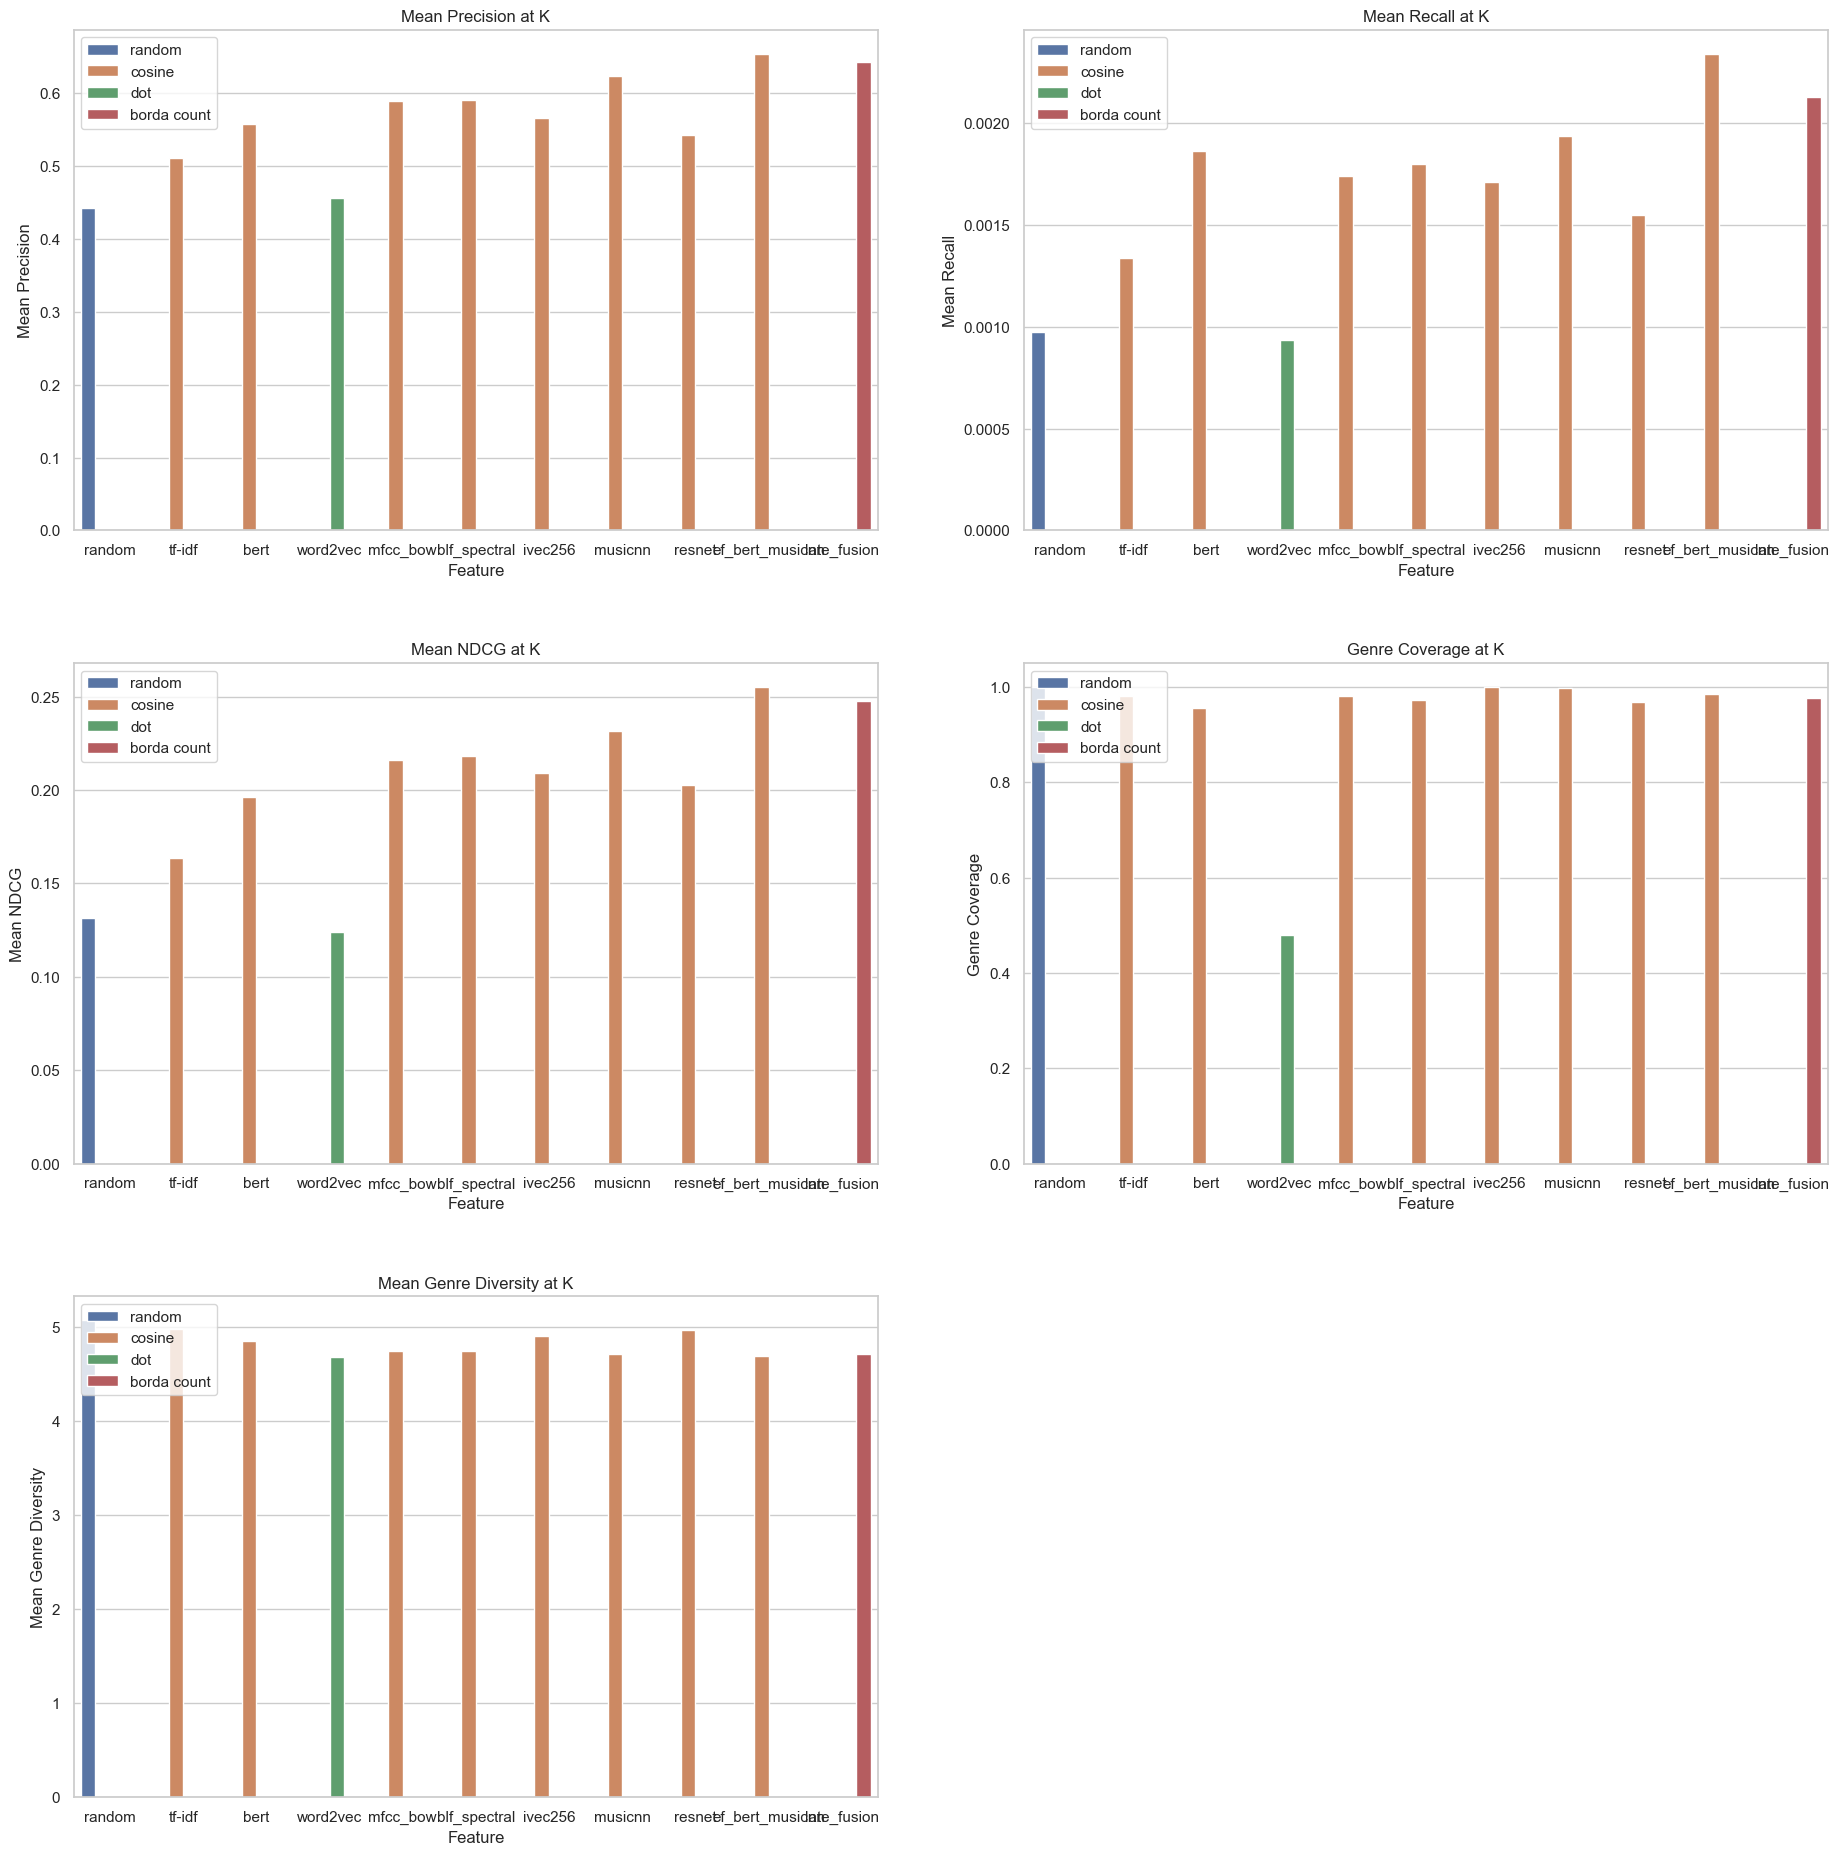

In [18]:

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
fig.tight_layout(pad=6.0)

sns.barplot(y="mean_precision_at_k", x="feature", hue="metric", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Mean Precision at K")
axes[0, 0].set_ylabel("Mean Precision")
axes[0, 0].set_xlabel("Feature")

sns.barplot(y="mean_recall_at_k", x="feature", hue="metric", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Mean Recall at K")
axes[0, 1].set_ylabel("Mean Recall")
axes[0, 1].set_xlabel("Feature")

sns.barplot(y="mean_ndcg_at_k", x="feature", hue="metric", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Mean NDCG at K")
axes[1, 0].set_ylabel("Mean NDCG")
axes[1, 0].set_xlabel("Feature")

sns.barplot(y="genre_coverage_at_k", x="feature", hue="metric", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Genre Coverage at K")
axes[1, 1].set_ylabel("Genre Coverage")
axes[1, 1].set_xlabel("Feature")

sns.barplot(
    y="mean_genre_diversity_at_k", x="feature", hue="metric", data=df, ax=axes[2, 0]
)
axes[2, 0].set_title("Mean Genre Diversity at K")
axes[2, 0].set_ylabel("Mean Genre Diversity")
axes[2, 0].set_xlabel("Feature")
axes[0, 0].legend(loc="upper left")
axes[0, 1].legend(loc="upper left")
axes[1, 0].legend(loc="upper left")
axes[1, 1].legend(loc="upper left")
axes[2, 0].legend(loc="upper left")

# hide empty subplot (6th one)
axes[2, 1].set_visible(False)

plt.show()

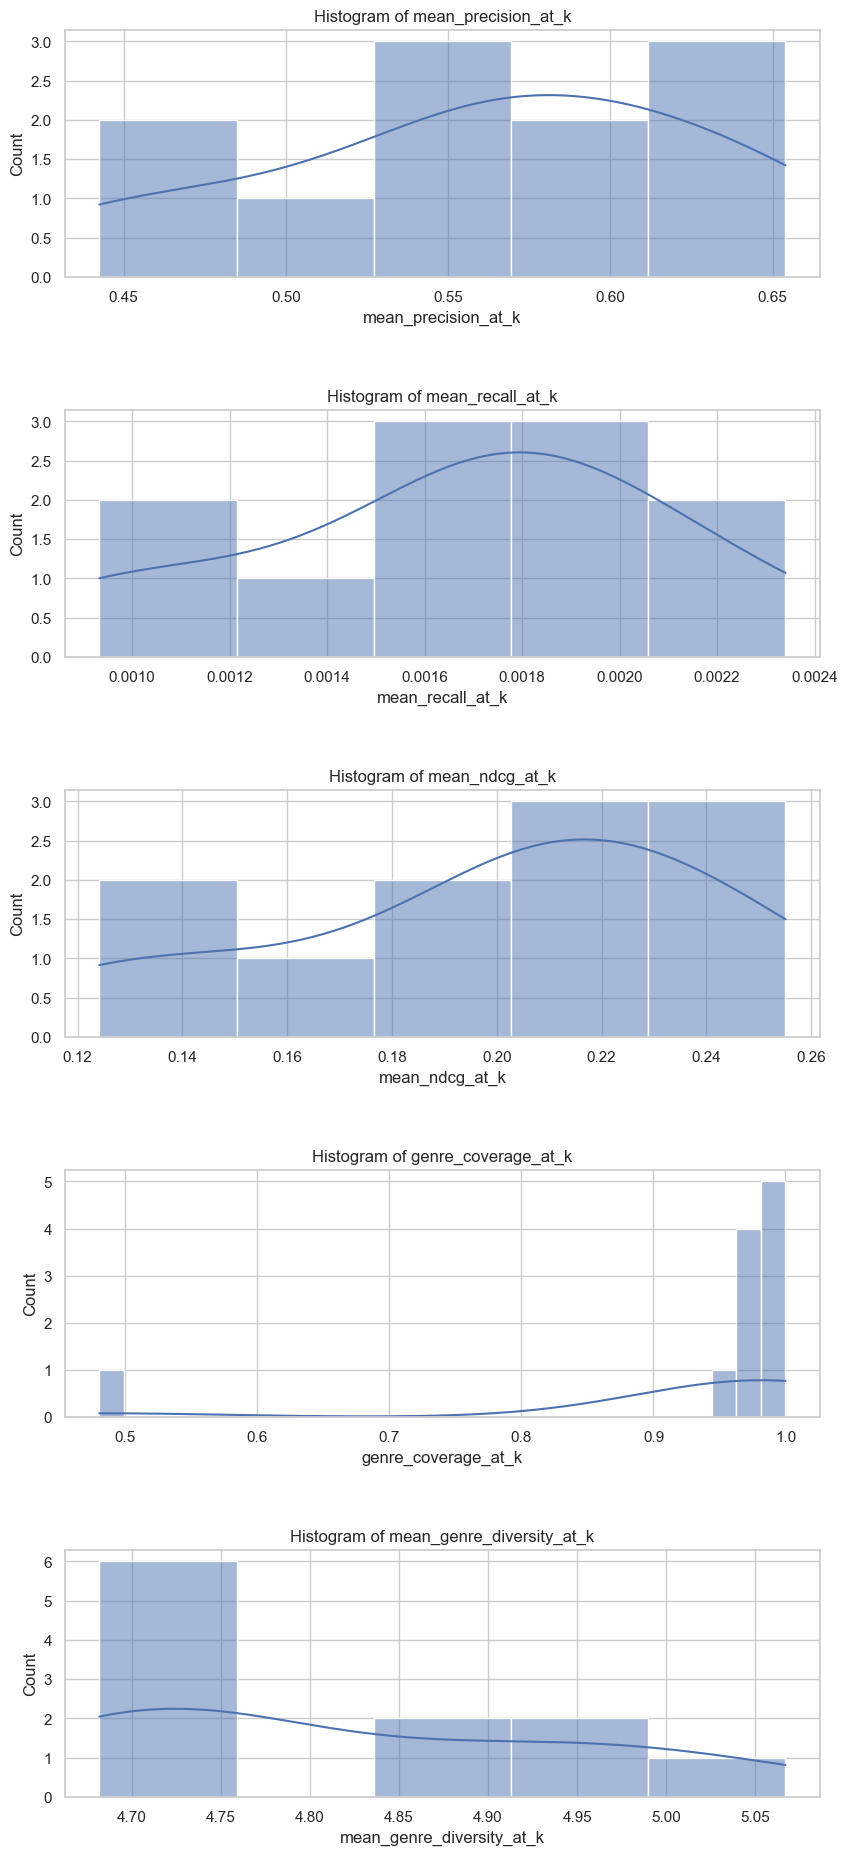

In [11]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 20))
fig.tight_layout(pad=6.0)

metrics_list=["mean_precision_at_k", "mean_recall_at_k", "mean_ndcg_at_k","genre_coverage_at_k","mean_genre_diversity_at_k"]

for i, metric in enumerate(metrics_list):
    sns.histplot(df[metric], kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram of {metric}")

plt.show()

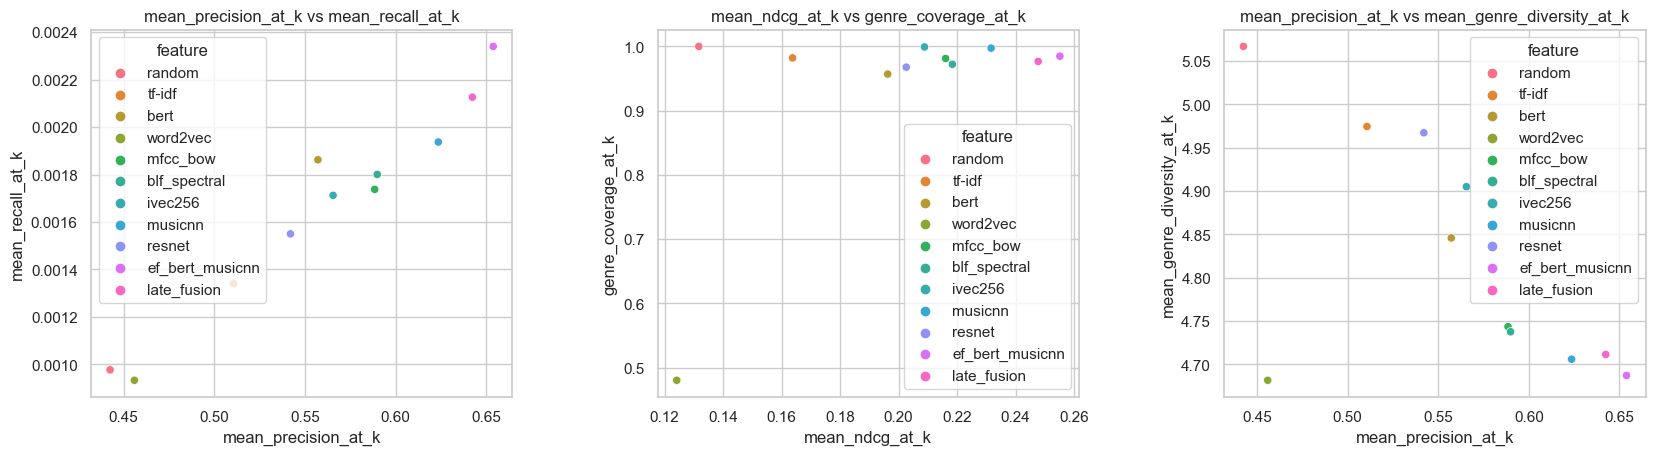

In [12]:
# Scatter plots for metric pairings
# Selecting a few interesting pairs of metrics
pairs = [
    ("mean_precision_at_k", "mean_recall_at_k"),
    ("mean_ndcg_at_k", "genre_coverage_at_k"),
    ("mean_precision_at_k", "mean_genre_diversity_at_k"),
]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.tight_layout(pad=6.0)

for i, (metric1, metric2) in enumerate(pairs):
    sns.scatterplot(x=metric1, y=metric2, hue="feature", data=df, ax=axes[i])
    axes[i].set_title(f"{metric1} vs {metric2}")

plt.show()

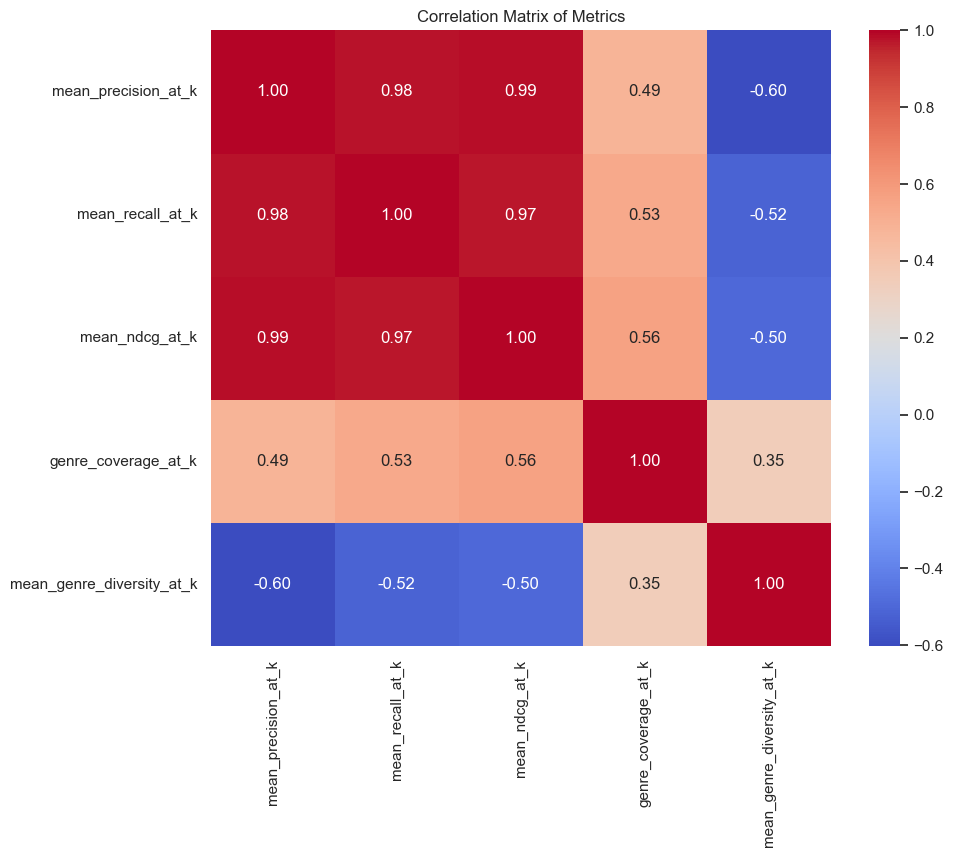

In [13]:
correlation_matrix = df[
    [
        "mean_precision_at_k",
        "mean_recall_at_k",
        "mean_ndcg_at_k",
        "genre_coverage_at_k",
        "mean_genre_diversity_at_k",
    ]
].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Metrics")
plt.show()

In [14]:
rs_show = df.drop(
    columns=[
        "rs_object",
        "metric_feature_combination",
        "precision_and_recall_interval",
    ],
    axis=1,
)

In [15]:
rs_show.to_latex(
    "task_3_table.tex", index=False, float_format="%.3f", column_format="llccccc"
)

C:\Users\Leonard Leber\AppData\Local\Temp\ipykernel_12568\372164958.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  rs_show.to_latex(
